# Cap Recognizer

In [ ]:
#|default_exp deploy_app

In [ ]:
!pip install -Uqq fastai gradio nbdev

In [ ]:
from fastai.vision.all import *

In [ ]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/2025_ALL_Master_Course_Works/ALL_DL_CV/CV-Project-1_Cap-Recognizer

/content/drive/MyDrive/2025_ALL_Master_Course_Works/ALL_DL_CV/CV-Project-1_Cap-Recognizer


In [ ]:
#!export
model = load_learner('models/cap-recognizer-v0.pkl')

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [ ]:
#!export
cap_labels = [
    "balaclava cap",
    "baseball cap",
    "beanie cap",
    "boater hat",
    "bowler hat",
    "bucket hat",
    "cowboy hat",
    "flat cap",
    "kepi cap",
    "taqiyah cap",
    "top hat",
    "turban cap",
    "visor cap"
]

def recognize_image(image):
    # image = PILImage.create(image)
    # image.thumbnail((192,192))
    pred, idx, probs = model.predict(image)
    return dict(zip(cap_labels, map(float, probs)))

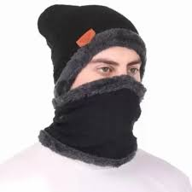

In [ ]:
img = PILImage.create(f'test_images/test-1.jpg')
img.thumbnail((192,192))
img

In [ ]:
recognize_image(img)

{'balaclava cap': 0.9998760223388672,
 'baseball cap': 1.1466507885415922e-06,
 'beanie cap': 2.8124245545768645e-06,
 'boater hat': 1.7667179008640232e-07,
 'bowler hat': 2.1962136997899506e-07,
 'bucket hat': 4.416247520566685e-06,
 'cowboy hat': 3.747984322899356e-08,
 'flat cap': 6.888147368044883e-07,
 'kepi cap': 4.330693172960309e-06,
 'taqiyah cap': 1.7467762347678217e-07,
 'top hat': 3.4237191925967636e-07,
 'turban cap': 0.00010593577462714165,
 'visor cap': 3.7606987461913377e-06}

In [ ]:
help(gr.Image)

Help on class Image in module gradio.components.image:

class Image(gradio.components.base.StreamingInput, gradio.components.base.Component)
 |  Image(value: 'str | PIL.Image.Image | np.ndarray | Callable | None' = None, *, format: 'str' = 'webp', height: 'int | str | None' = None, width: 'int | str | None' = None, image_mode: "Literal['1', 'L', 'P', 'RGB', 'RGBA', 'CMYK', 'YCbCr', 'LAB', 'HSV', 'I', 'F'] | None" = 'RGB', sources: "list[Literal['upload', 'webcam', 'clipboard']] | Literal['upload', 'webcam', 'clipboard'] | None" = None, type: "Literal['numpy', 'pil', 'filepath']" = 'numpy', label: 'str | I18nData | None' = None, every: 'Timer | float | None' = None, inputs: 'Component | Sequence[Component] | set[Component] | None' = None, show_label: 'bool | None' = None, show_download_button: 'bool' = True, container: 'bool' = True, scale: 'int | None' = None, min_width: 'int' = 160, interactive: 'bool | None' = None, visible: 'bool' = True, streaming: 'bool' = False, elem_id: 'str | N

In [ ]:
#!export

# from PIL import Image

image = gr.Image()
label = gr.Label()
examples = [
    'test_images/test-1.jpg',
    'test_images/test-2.jpg',
    'test_images/test-3.jpg',
    'test_images/test-4.jpg'
    ]

# generalized code
# iface = gr.Interface(fn=recognize_image, inputs=gr.Textbox(), outputs=gr.Textbox())

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)

iface.launch(inline=False)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://861dacc4301d7124e7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from PIL import Image

image = gr.Image()
label = gr.Label()
examples = [
    'test_images/test-1.jpg',
    'test_images/test-2.jpg',
    'test_images/test-3.jpg',
    'test_images/test-4.jpg'
    ]

# generalized code
# iface = gr.Interface(fn=recognize_image, inputs=gr.Textbox(), outputs=gr.Textbox())

iface1 = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)

iface1.launch(inline=False, share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c76a6bf5c4a7e31e45.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c62f649016951f84c7.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://c76a6bf5c4a7e31e45.gradio.live


In [ ]:
help(gr.Interface)

Help on class Interface in module gradio.interface:

class Interface(gradio.blocks.Blocks)
 |  Interface(fn: 'Callable', inputs: 'str | Component | Sequence[str | Component] | None', outputs: 'str | Component | Sequence[str | Component] | None', examples: 'list[Any] | list[list[Any]] | str | None' = None, *, cache_examples: 'bool | None' = None, cache_mode: "Literal['eager', 'lazy'] | None" = None, examples_per_page: 'int' = 10, example_labels: 'list[str] | None' = None, preload_example: 'int | Literal[False]' = False, live: 'bool' = False, title: 'str | I18nData | None' = None, description: 'str | None' = None, article: 'str | None' = None, theme: 'Theme | str | None' = None, flagging_mode: "Literal['never'] | Literal['auto'] | Literal['manual'] | None" = None, flagging_options: 'list[str] | list[tuple[str, str]] | None' = None, flagging_dir: 'str' = '.gradio/flagged', flagging_callback: 'FlaggingCallback | None' = None, analytics_enabled: 'bool | None' = None, batch: 'bool' = False, 

In [ ]:
help(gr.Interface.launch)

# Notebook to Python Script Export

In [ ]:
# updated way but not working in colab
from nbdev.export import nb_export
nb_export('CR-4_Deploy-App-in-Gradio-web.ipynb', '.')